# Comparative Advantages and Trade

In this project we show the results from by David Ricardos theory on Comparative Advantages in trade.

Imports and set magics:

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import time
from types import SimpleNamespace

# import no_trade as nt
from no_trade import no_trade_class as ntc
import figure_no_trade as fnt

import modelproject as moc

import numpy as np
import sympy as sm

from scipy import linalg
from scipy import optimize
from scipy.optimize import minimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
plt.rcParams.update({"axes.grid": True, "grid.color": "black",
                    "grid.alpha": "0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**$\large 1 \qquad \color{blue}{{The}\:{Model}}$**

*Comparative advantages and trade* 

This project models the optimal production of wine and cloth respectively for England and Portugal when the two countries trade with each other. The table below contrains the number of hours each country spend in producing one piece of the two goods:

| Country   | Cloth | Wine |      
|-----------|-------|------|      
| England   | 100   | 120  |           
| Portugal  | 90    | 80   |

England spends 100 hours in making one piece of cloth and 120 hours in making one bottle of wine. Portugal spends 90 hours producing one piece of cloth and 80 hours producing one bottle of wine. Portugal has an absolut advantage in production of both of the two goods. In the absense of trade, England requires 220 hours of work to produce one unit of each good, and Portugal requires 170 hours of work to produce the same quantities.

If the perspective is one year (i.e. 8760 hours), the maximum output of each of the two goods for each of the countries are as in the table below:

| Country   | Cloth | Wine |      
|-----------|-------|------|      
| England   | 87.6  | 73   |           
| Portugal  | 97.3  | 109.5|

If England speds all their time producing cloth, they ca produce 87.6 pieces of cloth, and if they spend all their time producing wine, they can make 73 bottles in one year. If Portugal spends all their time producing cloth, they can make 97.3 pieces in one year, and if they spend all their time producing wine, they can make 109.5 bottles of wine. 

*Opportunity Costs*

The table below displays the opportunity costs for each country for both of the goods. 

| Country   | OC Cloth | OC Wine |      
|-----------|----------|---------|      
| England   | 0.83     | 1.2     |           
| Portugal  | 1.13     | 0.89    |

It "costs" England 0.83 bottles of wine to produce one piece of cloth whereas it costs Portugal 1.13 bottles of wine to produce one piece of cloth. This implies that England has a comparative advantage in producing cloth. 

It "costs" England 1.2 pieces of clothing to produce one bottle of wine whereas it costs Portugal 0.89 pieces of clothing to produce one bottle of wine. This implies that Portugal has a comparative advantage in producing wine. 

If both countries specialize in their comparative advantage and then trade, they can get outcomes that are beyond each of their individual production possibility frontier (PPF) and thereby achieve a higher utility level compared to the case in which they do not trade with each other. 

The market "price" of cloth when trading will be in between 0.83 and 1.13. In this interval, both parties benefit from the trade as England gets a higher "price" than what it "costs" to produce it, and Portugal "buy" the cloth cheaper than what it would have cost them to produce it themselves. The market "price" for wine when trading will be in between 0.89 and 1.2 for the same reasons as with cloth - just the other way around. To summarize; the market "prices" in these intervals make sence for both countries because the "prices" are lower than their opportunity cost of producing it themselves.

**$\large 2 \qquad \color{blue}{{The}\:{Model}\:{without}\:{Trade}}$**

Here we show the initial production possibility frontier. 

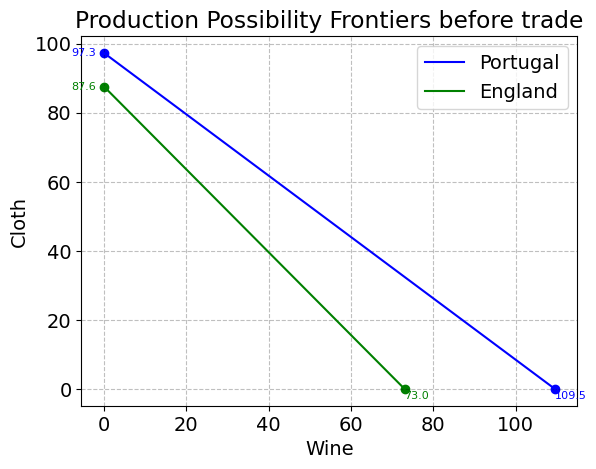

In [61]:
# Plot the Production Possibility Frontiers from before trade: 
from figure_no_trade import Production_Possibility_Frontiers

model = Production_Possibility_Frontiers() 
model.plot_production_graphs()


And, the optimal produciton = consumption when the countries are not trading is:

In [62]:
ntc.portugal_production(Option=True)
print('\n')
ntc.england_production(Option=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -51.61879502634704
            Iterations: 8
            Function evaluations: 24
            Gradient evaluations: 8
Portugal produces 54.75 units of wine and 48.67 units of cloth.
And, the resulting utility level is 51.62


Optimization terminated successfully    (Exit mode 0)
            Current function value: -39.98374669812673
            Iterations: 10
            Function evaluations: 30
            Gradient evaluations: 10
England produces 36.50 units of wine and 43.80 units of cloth.
And, the resulting utility level is 39.98


(36.500006939446294, 43.799991673212894, 39.98374669812673)

Below is a plot showing this result.

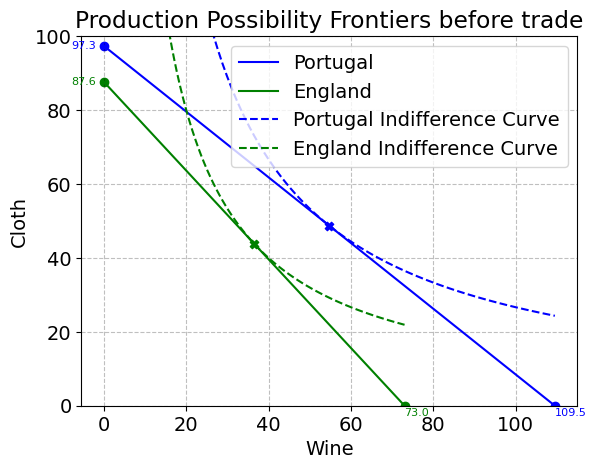

In [63]:
from figure_no_trade import Plot_before_trade
# Plot the solutions from before trade: 
model = Plot_before_trade() 
model.plot_bt_graphs()

Now, according to Ricardo if they were to trade with England they would be able to consume more of both output, given that both England and Portugal were to produce more of the good inwhich they had a comparative advantage. 

If they worked the same number of hours (8760 hours), and traded, taking advantage of their comparative advantages, what would the new comsumption bundels look like?

**$\large 3 \qquad \color{blue}{{The}\:{Model}\:{with}\:{Trade}}$**

In [64]:
opt = moc.optimal_trade(do_plot=False, do_print=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -98.07532551297615
            Iterations: 21
            Function evaluations: 189
            Gradient evaluations: 21
The optimal production levels for Portugal are 103.77 units of wine and 5.09 units of cloth
The export of wine from Portugal to England is 48.89 units
The export of cloth from Portugal to England is 5.09 units
The consumption levels for Portugal are 54.87 units of wine and 48.89 units of cloth
The utility for Portugal is 51.80


The optimal production levels for England are 0.00 units of wine and 87.60 units of cloth
The export of wine from England to Portugal is 0.00 units
The export of cloth from England to Portugal is 48.89 units
The consumption levels for England are 48.89 units of wine and 43.80 units of cloth
The utility for England is 46.28


The rate of trade for Portugal is 1.00 units of wine for one unit of cloth
The rate of trade for England is 1.00 units of cloth for

The utililty has increased for both, and they both consume either the same amount or more of both goods. 

Lastly, the "rate of trade" which we required to be 1, are stated. For 1 unit of wine England gets 1 unit of cloths. 

This is a reasonable soluation as 1 lies between the bewteen the oppotunity cost for the countries, which defines the terms of trade. 
England will not buy wine for more cloth that what they would have to give up to produce themselves (120/100) - 1 is below this.
Portugal will not buy cloth for more wine than what they would have to give up to produce it themselves (90/80) - 1 is below this.

And 1 is above the lowest price both England and Portugal is willing to sell at. 

**$\large 4 \qquad \color{blue}{{Further}\:{Analysis}}$**

Holding Englands preferences fixed at $\alpha = 0.5$, how does the optimal production/consumption for each of the countries change.



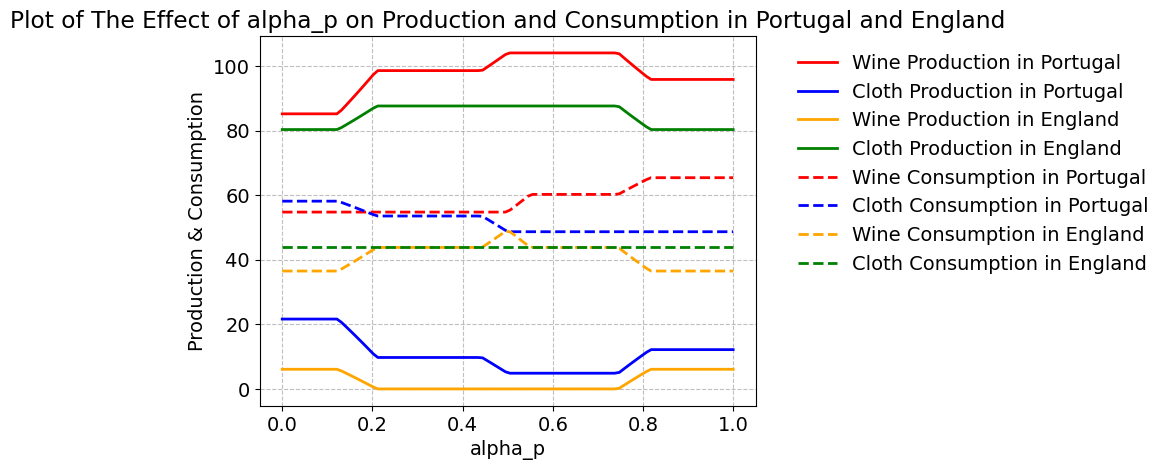

In [65]:
import figure_alpha_p as fap
fap.Different_alpha_p(do_plot=True)

For all levels of preferences for Portugal, Portugal is the main producer of wine, and England is the main producer of cloth. This is because of the comparative advantages. 

Portugal consumes more than England in both wine and cloth, as they do have the absolut advantage. But, both England and Portugal have relativly constant consumption bundles for all $\alpha_p <= 0.5$, after this point Portugal consumes more wine.  

While Portugals production of wine generally increases as the preferences for this shifts towards wine, the do degrees when $\alpha$ lies between $0.8$ and $1$. At this point Portugal has such strong preferences for wine, that England, eventhough they are less productive in wine production, will start producing this aswell. 

# Conclusion

Ricardos theory is correct.

When two countries each have comparative advantage it is beneficial for them to trade, specializing in the producion in which they are the most productive.

The further analysis showed that when two contries are trading, the preferences of the other country affects the optimal production decision of the original country. 